# Building a classifier for poisonous muchrooms

We have a [dataset](https://archive.ics.uci.edu/ml/datasets/Mushroom) with the following information about 8124 mushrooms drawn from _The Audubon Society Field Guide to North American Mushrooms_.

1. Is poisonous (our dependent variable)
2. cap shape
3. cap surface texture
4. cap color
5. has bruises?
6. odor
7. is gill attached?
8. gill spacing
9. gill size 
10. gill color
11. stalk shape
12. stalk root
13. stalk surface texture above-ring
14. stalk surface texture below-ring
15. stalk color above-ring
16. stalk color below-ring
17. veil type
18. veil color
19. number of rings
20. ring type
21. spore print color
22. population
23. habitat

We would like to predict whether a mushroom is poisonous based on the other 22 attributes. We will use a decision tree classifer for this.


## Loading our data

In [2]:
import seaborn
import pandas


mushroom_dataframe = pandas.read_csv("Mushrooms.csv", dtype="category")
mushroom_dataframe

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


## Preparing data

We need to convert categorical data to numeric data, extract our dependent (y) variable and our features, then split into training (80%) and test data (20%).

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


labels = LabelEncoder().fit_transform(mushroom_dataframe.poisonous).reshape(-1, 1)

features = (mushroom_dataframe
            .drop("poisonous", axis=1)
            .apply(LabelEncoder().fit_transform)
            .to_numpy()
            .reshape(-1, mushroom_dataframe.shape[1] - 1))

#feature_list = ["cap-color", "gill-color", "habitat"]
#features = (mushroom_dataframe[feature_list]
#            .apply(LabelEncoder().fit_transform)
#            .to_numpy()
#            .reshape(-1, len(feature_list)))

# Split our data into training and test data.
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2)



NameError: name 'mushroom_dataframe' is not defined

## Training and evaluating

We'll train the model and then find the accuracy and create a [truth table](https://en.wikipedia.org/wiki/Truth_table).


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=5)
classifier.fit(features_train, labels_train)
predictions = classifier.predict(features_test)
print("Accuracy is: {:.2f}%".format(accuracy_score(labels_test, predictions) * 100))
tn, fp, fn, tp = confusion_matrix(labels_test, predictions).ravel()
print(f"True-negative={tn}, True-positive={tp}, False-negative={fn}, FalsePositive={fp}")

Accuracy is: 99.38%
True-negative=845, True-positive=770, False-negative=0, FalsePositive=10


## Looking into how the classifier works

Scikit-learn can produce a visual representation of our decision tree.


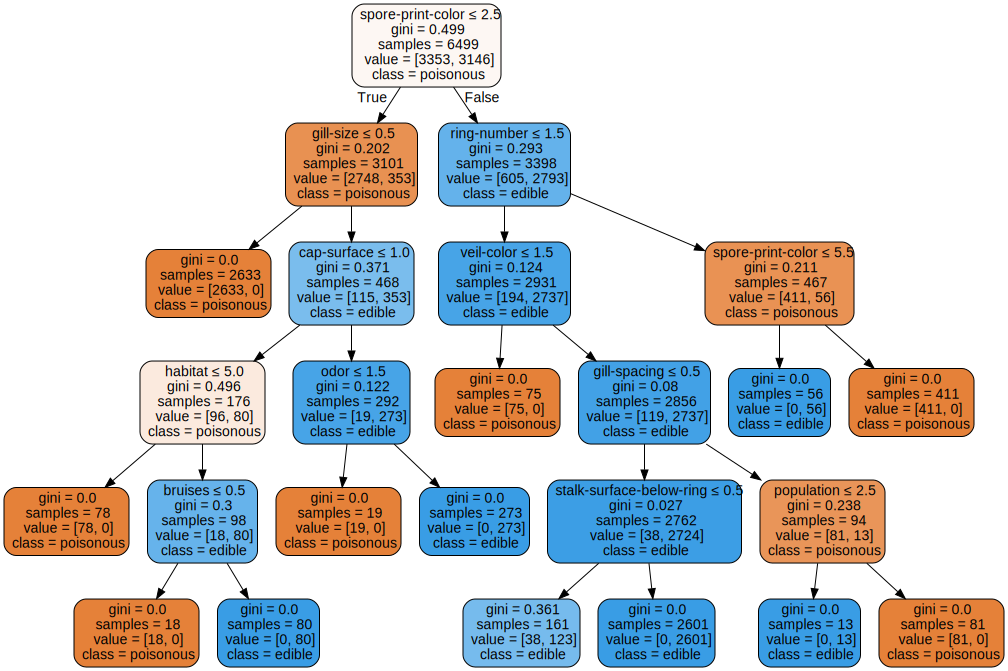

In [14]:
import graphviz 
from sklearn.tree import DecisionTreeClassifier, export_graphviz

dot_data = export_graphviz(classifier, out_file=None, 
                                feature_names=mushroom_dataframe.drop("poisonous", axis=1).columns.to_list(),  
                                class_names=mushroom_dataframe.poisonous.unique().to_list(),  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 